# Session 2: The Power of Quantum Capabilities

#(Completed Notebook)


In this session we put our mathematical and numerical skills together to study quantum protocols in communication and computation to better understand the resources quantum mechanics provides information processing.

## Setting Up the Notebook

These are just the commands for importing the packages we will use.

In [ ]:
# Install qiskit and graphical representation we will use
!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
# Import relevant code from Qiskit
from qiskit import *
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_aer import AerSimulator

In [ ]:
# Import numpy
import numpy as np
from numpy import sqrt #So we don't have to call math function

## Example 1: Quantum Teleportation

Here we explore the power of entanglement in communication by studying quantum teleportation which allows us to send quantum information between parties using entanglement and classical communication.

### Problem 1: Simulating Teleportation

We begin by simulating quantum teleportation. We split this into many steps to avoid confusion.

**Problem 1.a** Define the initial qubit state on Alice's side. We will modify this later so we can choose what state we want to transmit.

In [ ]:
#1.a
init_sv= Statevector(1/sqrt(2)*np.array([1,1]))

**Problem 1.b** Define a quantum circuit `qc` with 3 qubits and 3 classical bits. Then add
```
  qc.initialize(init_sv,0,normalize=True)
  qc.barrier()
```
The first command allows you to initialize the zero-th qubit (Alice's qubit) with whatever state you want (we are using the optional control `normalize' to avoid any issues with normalization). `qc.barrier()` just draws a separation, which will make it easier to parse the circuit as we add more sections.



In [ ]:
#1.b
num_qubits = 3
num_cbits = 3
qc = QuantumCircuit(num_qubits,num_cbits)
qc.initialize(init_sv,0, normalize=True)
qc.barrier()
print(qc)

     ┌─────────────────────────────┐ ░ 
q_0: ┤ Initialize(0.70711,0.70711) ├─░─
     └─────────────────────────────┘ ░ 
q_1: ────────────────────────────────░─
                                     ░ 
q_2: ────────────────────────────────░─
                                     ░ 
c: 3/══════════════════════════════════
                                       


**Problem 1.c** Now prepare the 1st and 2nd qubits as the maximally entangled state. This can be done using the same circuit as we used in Session 1. Put a barrier command after and print the circuit to verify it looks correct.

In [ ]:
#1.c
qc.h(1)
qc.cx(1,2)
qc.barrier()
print(qc)

     ┌─────────────────────────────┐ ░            ░ 
q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░─
     └─────────────────────────────┘ ░ ┌───┐      ░ 
q_1: ────────────────────────────────░─┤ H ├──■───░─
                                     ░ └───┘┌─┴─┐ ░ 
q_2: ────────────────────────────────░──────┤ X ├─░─
                                     ░      └───┘ ░ 
c: 3/═══════════════════════════════════════════════
                                                    


**Problem 1.d** Now add Alice's preprocessing in the teleportation scheme (she applies CNOT with her portion of the maximally entangled state as the target and the state she wishes to teleportat as the target). Again, add a barrier and print the circuit to make sure it looks appropriate.

In [ ]:
#1.d
qc.cx(0,1)
qc.h(0)
qc.barrier()
print(qc)

     ┌─────────────────────────────┐ ░            ░      ┌───┐ ░ 
q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─
     └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ────────────────────────────────░──────┤ X ├─░────────────░─
                                     ░      └───┘ ░            ░ 
c: 3/════════════════════════════════════════════════════════════
                                                                 


**Problem 1.e** Now have Alice measure the zero-th qubit and store it in the zero-th classical bit. Have Alice do the same with the first qubit and first classical bit. Again, put a barrier and print the circuit to verify it works.

In [ ]:
#1.e
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
print(qc)

     ┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─┤M├────░─
     └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─
                                     ░      └───┘ ░            ░  ║  ║  ░ 
c: 3/═════════════════════════════════════════════════════════════╩══╩════
                                                                  0  1    


**Problem 1.f** We now need Bob to perform his correction scheme as should be depicted on the slide. To add this to the circuit, use the `c_if()` method which will apply a gate to a quantum register conditioned on a classical bit property. For example, `qc.x(0).c_if(0,1)` would apply the Pauli X gate to the zero-th qubit if the zero-th classical bit were 1.

Again, print the circuit to verify it looks correct (this may be less clear as all the classical bits are represented by one line).

In [ ]:
#1.f
qc.x(2).c_if(1,1)
qc.z(2).c_if(0,1)
qc.barrier()
print(qc)

     ┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
     └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                     ░      └───┘ ░            ░  ║  ║  ░ »
c: 3/═════════════════════════════════════════════════════════════╩══╩════»
                                                                  0  1    »
«                            ░ 
«q_0: ───────────────────────░─
«                            ░ 
«q_1: ───────────────────────░─
«        ┌───┐      ┌───┐    ░ 
«q_2: ───┤ X ├──────┤ Z ├────░─
«        └─╥─┘      └─╥─┘    ░ 
«     ┌────╨────┐┌────╨────┐   
«c: 3/╡ c_1=0x1 ╞╡ c_0=0x1 ╞═══
«     └─────────┘└─────────┘

**Problem 1.g** At this point you have implemented the quantum teleportation protocol if it has been done correctly. However, we would like to verify this. To do so, we will simulate the circuit and measure the final qubit to make sure it has the correct output probabilities. To do this:
1. Copy the initial statevector command from above in a single cell by itself so it will be easy to manipulate.
2. Group together all the code you did above to define the circuit. Add a measurement on Bob's qubit that is read the second (i.e. third if we were to index from 1) classical qubit. Print the circuit to make sure you have done this.
3. Run the simulator code below on the circuit. Make sure the output makes sense to you by varying Alice's input. Note the plot will order the classical registers as c2,c1,c0.

**Suggestion:** If the output is confusing, start by looking at when Alice wants to send $\vert 0 \rangle$ or $\vert 1 \rangle$.

In [ ]:
#1.g.1
init_sv= Statevector(1/sqrt(2)*np.array([1,1]))

In [ ]:
#1.g.2
num_qubits = 3
num_cbits = 3
qc = QuantumCircuit(num_qubits,num_cbits)
qc.initialize(init_sv,0, normalize=True)
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.x(2).c_if(1,1)
qc.z(2).c_if(0,1)
qc.barrier()
qc.measure(2,2)
print(qc)

     ┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
q_0: ┤ Initialize(0.70711,0.70711) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
     └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
q_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
q_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                     ░      └───┘ ░            ░  ║  ║  ░ »
c: 3/═════════════════════════════════════════════════════════════╩══╩════»
                                                                  0  1    »
«                            ░    
«q_0: ───────────────────────░────
«                            ░    
«q_1: ───────────────────────░────
«        ┌───┐      ┌───┐    ░ ┌─┐
«q_2: ───┤ X ├──────┤ Z ├────░─┤M├
«        └─╥─┘      └─╥─┘    ░ └╥┘
«     ┌────╨────┐┌────╨────┐    ║ 
«c: 3/╡ c_1=0x1 ╞╡ c_0=0x1 ╞════╩═
«

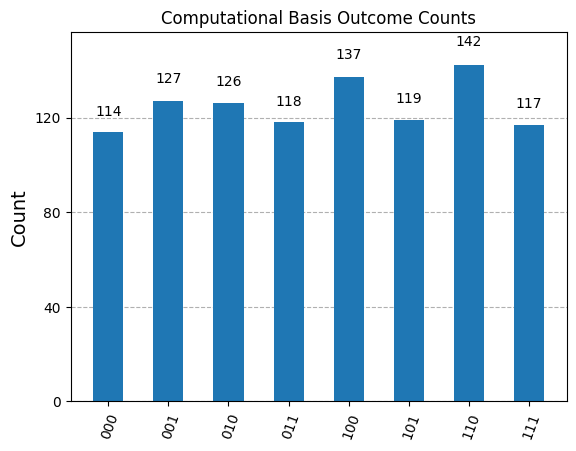

In [ ]:
#1.g.3

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=1000).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')
# The counts are ordered c2,c1,c0

### Optional Problem: Entanglement Swapping
It turns out that the quantum teleportation circuit can also be used to share arbitrary entangled states between parties--- even ones that don't communicate with eachother if it is done over long chains. In the case that there are only two parties, this is known as "entanglement swapping." Below you can implement this.

**OptProb.a** The quantum circuit will have 4 qubits and 4 classical bits. The first two qubits will be an entangled state that Alice holds locally. Initialize such an entangled state as a state vector.

**Note:** It should be a 4 dimensional vector as it is two qubits.

In [ ]:
#OptProb.a
init_sv= Statevector(1/sqrt(2)*np.array([1,0,0,1]))

**OptProb.b** Modify the quantum circuit from Problem 1 so that it runs the teleportation scheme on the first through third qubit (where we are using computer science notation that starts at zero) and then measures Alice's and Bob's remaining qubits. Print the circuit to make sure it makes sense.

**Hint:** You will need `qc.initialize(init_sv,[0,1], normalize=True)` so that it intializes Alice's entangled state as the first two qubits.

In [ ]:
#OptProb.b
num_qubits = 4
num_cbits = 4
qc = QuantumCircuit(num_qubits,num_cbits)
qc.initialize(init_sv,[0,1], normalize=True)
qc.barrier()
qc.h(2)
qc.cx(2,3)
qc.barrier()
qc.cx(1,2)
qc.h(1)
qc.barrier()
qc.measure(1,0)
qc.measure(2,1)
qc.barrier()
qc.x(3).c_if(1,1)
qc.z(3).c_if(0,1)
qc.barrier()
qc.measure(3,2)
qc.measure(0,3)
print(qc)

     ┌──────────────────────────────────┐ ░            ░            ░        ░ »
q_0: ┤0                                 ├─░────────────░────────────░────────░─»
     │  Initialize(0.70711,0,0,0.70711) │ ░            ░      ┌───┐ ░ ┌─┐    ░ »
q_1: ┤1                                 ├─░────────────░───■──┤ H ├─░─┤M├────░─»
     └──────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
q_2: ─────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                          ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
q_3: ─────────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                          ░      └───┘ ░            ░  ║  ║  ░ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩════»
                                                                       0  1    »
«                            ░    ┌─┐
«q_0: ───────────────────────░────┤M├
«                            ░   

**OptProb.c** Simulate the circuit and look at the outcomes. Verify that Alice and Bob share entanglement with this method.

**Hint:** An easy way to check the entanglement is to have Alice start with the maximally entangled state and then verify Alice and Bob's final measurements are perfectly correlated. Remember that the classical bit readout will be c3,c2,c1,c0

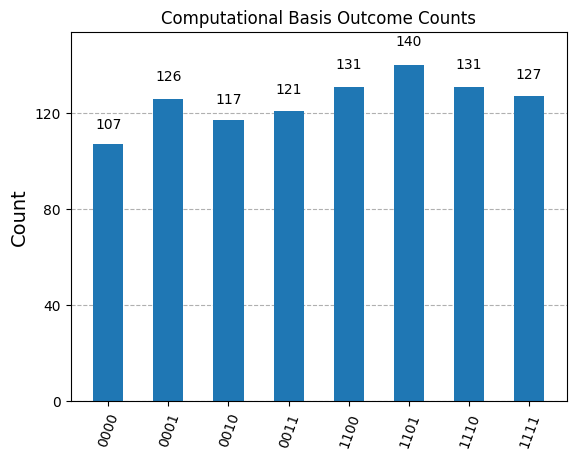

In [ ]:
#OptProb.c

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=1000).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')
# The counts are ordered c3,c2,c1,c0

## Example 2: Deutsch-Jozsa Algorithm

Here we explore the power of superposition by simulating the Deutsch-Jozsa algorithm with a single input qubit ($n=1$). The problem is as follows: there is an unkown function $f: \{0,1\}^{n} \to \{0,1\}$ that is promised to be either

1.   **Balanced:** There are exactly $n/2$ inputs $x \in \{0,1\}^{n}$ such that $f(x) = 0$.
2.   **Constant:** $f$ takes every input to the same value (all zero or all one).

The goal is to determine if $f$ is balanced or constant. Classically, in the worst case, one must ask for the value of $f$ on $2^{n-1}+1$ inputs (**why?**). One asks for the value of $f$ from an "oracle." Each time one has to ask for a value from the oracle, it is called a "query." Thus we say classically the "query complexity" of determining if the function is balanced or canstant is $2^{n-1}+1$, i.e. the query complexity of this problem is exponential in the number of bits.


However, we can do significantly better using a "quantum oracle." Here we will simulate the algorithm for the $n=1$ case, but the methodology generalizes.

The key ingredient is building the "quantum oracle." We begin by building "bit oracle" which for function $f$ acts on the computational basis as follows:
$$ \vert a,b \rangle \mapsto \vert a, b \oplus f(a) \rangle \ , $$
where $\oplus$ is the XOR.

For $n=1$ there are four cases:
1. If $f$ is the constant zero, this map is equivalent to the identity.
2. If $f$ is the constant one, this map is equivalent to applying X to the second register.
3. If $f(0)=0$ and $f(1)=1$, ("balanced identity"), this map is equivalent to applying CNOT controlled on the $a$ qubit and acting on the $b$ qubit.
4. If $f(1) =0$ and $f(1)=0$, ("balanced flip"), this map is equivalent to first applying X to the second register and then applying the CNOT as described previously.

**Problem 2.a.** Complete the function below so that in each case it adds the appropriate gates to enact the bit oracle described above. We have provided one case for clarity.

In [ ]:
#2.a
def DJ_bit_oracle(qc,c_reg,t_reg,choice):
  if choice == "constant0":
    pass
  elif choice == "constant1":
    qc.x(t_reg)
  elif choice == "balanced-id":
    qc.cx(c_reg,t_reg)
  elif choice == "balanced-flip":
    qc.x(t_reg)
    qc.cx(c_reg,t_reg)
  else:
    raise Exception("The choice must be constant0, constant1, balanced-id, or ballanced-flip")

  return qc

**Problem 2.b** We actually don't want to use the bit oracle, but rather the phase oracle. A phase oracle instead has the following action:
$$ \vert a,b \rangle \mapsto (-1)^{f(a)} \vert a ,b \rangle \ . $$
We call this a "phase oracle" because the phase changes depending on $a$ and the function $f$. It turns out one can convert a bit oracle to a phase oracle by applying Hadamards on the qubit $b$ before and after the bit oracle. Define a function that implements this.

**Hint:** It is easiest to simply modify the above function.

In [ ]:
#2.b
def DJ_phase_oracle(qc,c_reg,t_reg,choice):
  qc.h(1)
  if choice == "constant0":
    pass
  elif choice == "constant1":
    qc.x(t_reg)
  elif choice == "balanced-id":
    qc.cx(c_reg,t_reg)
  elif choice == "balanced-flip":
    qc.x(t_reg)
    qc.cx(c_reg,t_reg)
  else:
    raise Exception("The choice must be constant0, constant1, balanced-id, or ballanced-flip")

  qc.h(1)
  return qc

**Problem 2.c** Build the quantum circuit that does the following.

1. A Hadamard is applied to the zeroth qubit.
2. The X gate is applied to the first qubit.
3. The phase oracle is called.
4. A Hadamard is applied to the zeroth qubit.
5. The zeroth qubit is measured.

Print the circuit to verify it follows the above instructions.

**Suggestion:** Use `qc.barrier` between items in the above list to keep track.



In [ ]:
#2.c
num_qubits = 2
num_cbits = 1
qc = QuantumCircuit(num_qubits,num_cbits)
qc.h(0)
qc.barrier()
qc.x(1)
qc.barrier()
qc = DJ_phase_oracle(qc,0,1,"balanced-id")
qc.barrier()
qc.h(0)
qc.measure(0,0)
print(qc)

     ┌───┐ ░       ░                 ░ ┌───┐┌─┐
q_0: ┤ H ├─░───────░────────■────────░─┤ H ├┤M├
     └───┘ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ──────░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░───────╫─
           ░ └───┘ ░ └───┘└───┘└───┘ ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 


**Problem 2.d** Use the simulator to see what the measurement outcome distribution is in each of the four possible cases. What does this show you?

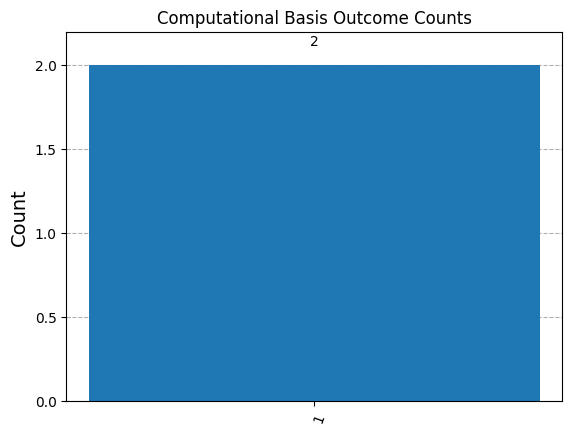

In [ ]:
#2.d

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=2).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')
# The counts are ordered c2,c1,c0

**Answer:** It shows us that the measurement outcome is always zero when the function is constant and always one when the function is balanced. This means we only need one quantum oracle query to perfectly determine whether the function is balanced or constant rather than $2^{n-1}$ queries!